In [4]:
import sys
sys.path.append("..")

import pickle
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams["figure.figsize"] = (6,6)
from rootpy.vector import LorentzVector

# Load and extract data

In [5]:
fd = open("/scratch/jb6504/data/w-vs-qcd/anti-kt/antikt-kt-test.pickle", "rb")
X0, y0 = pickle.load(fd, encoding='latin1')
fd.close()

fd = open("/scratch/jb6504/data/w-vs-qcd/anti-kt/antikt-kt-pileup25-new-test.pickle", "rb")
X, y = pickle.load(fd, encoding='latin1')
fd.close()

In [81]:
a0_s = []
pt0_s = []
m0_s = []

a0_b = []
pt0_b = []
m0_b = []

for j, this_y in zip(X0, y0):
    constituents = j["content"][j["tree"][:, 0] == -1]
    if this_y == 0:
        a0_b.append(np.array([[LorentzVector(c).pt(),
                              LorentzVector(c).eta(), 
                              LorentzVector(c).phi(),
                              LorentzVector(c).e] for c in constituents]))
        pt0_b.append(j["pt"])
        m0_b.append(j["mass"])
    elif this_y == 1:
        a0_s.append(np.array([[LorentzVector(c).pt(),
                              LorentzVector(c).eta(), 
                              LorentzVector(c).phi(),
                              LorentzVector(c).e] for c in constituents]))
        pt0_s.append(j["pt"])
        m0_s.append(j["mass"])
    if len(a0_b) >= 100000 and len(a0_s) >= 100000:
        break
    
#a0_s = np.vstack(a0_s)
#a0_b = np.vstack(a0_b)

In [82]:
a_s = []
pt_s = []
m_s = []

a_b = []
pt_b = []
m_b = []

for j, this_y in zip(X, y):
    constituents = j["content"][j["tree"][:, 0] == -1]
    if this_y == 0:
        a_b.append(np.array([[LorentzVector(c).pt(),
                              LorentzVector(c).eta(), 
                              LorentzVector(c).phi(),
                              LorentzVector(c).e] for c in constituents]))
        pt_b.append(j["pt"])
        m_b.append(j["mass"])
    elif this_y == 1:
        a_s.append(np.array([[LorentzVector(c).pt(),
                              LorentzVector(c).eta(), 
                              LorentzVector(c).phi(),
                              LorentzVector(c).e] for c in constituents]))
        pt_s.append(j["pt"])
        m_s.append(j["mass"])
    if len(a_b) >= 100000 and len(a0_s) >= 100000:
        break

#a_s = np.vstack(a_s)
#a_b = np.vstack(a_b)

# Jet mass and pT, cropping 

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(pt_s, range=(0.,500.), bins=80, histtype='step', label='S')
plt.hist(pt_b, range=(0.,500.), bins=80, histtype='step', label='B')
plt.legend()
plt.xlim(0.,500.)

plt.subplot(122)
plt.hist(m_s, range=(0.,300.), bins=80, histtype='step', label='S')
plt.hist(m_b, range=(0.,300.), bins=80, histtype='step', label='B')
plt.legend()
plt.xlim(0.,300.)

plt.show()

In [ ]:
def calculate_efficiencies(pt, m, pt_min, pt_max, m_min, m_max):
    
    pt = np.asarray(pt)
    m = np.asarray(m)
    
    full = len(pt)
    pass_cuts = len(pt[ (pt>pt_min) & (pt<pt_max) & (m>m_min) & (m<m_max)])
    
    return float(pass_cuts) / float(full)

In [ ]:
# Original efficiencies
eps0_s = calculate_efficiencies(pt0_s, m0_s, 250., 300., 50., 110.)
eps0_b = calculate_efficiencies(pt0_b, m0_b, 250., 300., 50., 110.)

print("Without pileup: Signal efficiency =", eps0_s)
print("Without pileup: Background efficiency =", eps0_b)

In [ ]:
min_pt = 300.
min_m = 150.

best_d = 9999.

for max_pt in np.linspace(305.,600.,60):
    for max_m in np.linspace(155.,400.,50):
        eps_s = calculate_efficiencies(pt_s, m_s, min_pt, max_pt, min_m, max_m)
        eps_b = calculate_efficiencies(pt_b, m_b, min_pt, max_pt, min_m, max_m)
        d = (eps_s - eps0_s)**2 + (eps_b - eps0_b)**2
        
        if d < best_d:
            best_d = d
            best_max_pt = max_pt
            best_max_m = max_m
            best_eps_s = eps_s
            best_eps_b = eps_b
         
print("pt <", best_max_pt)
print("m <", best_max_m)
print("Signal efficiency =", best_eps_s)
print("Background efficiency =", best_eps_b)

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(pt0_b[::100], pt_b[::100],
            s=10., c='C0', alpha=0.5,
           label="Signal")
plt.scatter(pt0_s[::100], pt_s[::100],
            s=10., c='C1', alpha=0.5,
           label="Background")
plt.plot([250.,250.],[0.,1000.],
        color='0.5')
plt.plot([300.,300.],[0.,1000.],
        color='0.5')
plt.plot([0.,1000.],[min_pt,min_pt],
        color='0.5')
plt.plot([0.,1000.],[best_max_pt,best_max_pt],
        color='0.5')
plt.legend()
plt.xlim((100.,500.))
plt.ylim((100.,500.))
plt.xlabel(r'Jet $p_T$ without pileup [GeV]')
plt.ylabel(r'Jet $p_T$ with pileup [GeV]')

plt.subplot(122)
plt.scatter(m0_b[::100], m_b[::100],
            s=10., c='C0', alpha=0.5,
           label="Signal")
plt.scatter(m0_s[::100], m_s[::100],
            s=10., c='C1', alpha=0.5,
           label="Background")
plt.plot([50.,50.],[0.,1000.],
        color='0.5')
plt.plot([110.,110.],[0.,1000.],
        color='0.5')
plt.plot([0.,1000.],[min_m,min_m],
        color='0.5')
plt.plot([0.,1000.],[best_max_m,best_max_m],
        color='0.5')
plt.legend()
plt.xlim((0.,300.))
plt.ylim((0.,300.))
plt.xlabel(r'Jet mass without pileup [GeV]')
plt.ylabel(r'Jet mass with pileup [GeV]')

plt.show()

# Jet substructure

In [ ]:
print(float(a0.shape[0]) / 10000)
print(float(a.shape[0]) / 10000)

In [ ]:
plt.hist(a0[:, 0], range=(0.,15.), bins=80, histtype='step', label='without pileup')
plt.hist(a[:, 0], range=(0.,15.), bins=80, histtype='step', label='with pileup')

plt.legend()
plt.yscale('log', nonposy='clip')
plt.xlim((0.,15.))
plt.xlabel(r'$p_T$ [GeV]')

plt.show()

In [ ]:
cmax = 2.5

fig = plt.figure(figsize=(6,5))

plt.hist2d(a0_s[:, 1], a0_s[:, 2], range=[(-2,2), (-2,2)], 
           bins=80, cmap="viridis", norm=LogNorm(),
           weights=[1./(len(m0_s))] * len(a0_s),
           cmax=cmax, vmax=cmax)

cbar = plt.colorbar()
cbar.set_label('Mean number of particles')

plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')

plt.savefig("average_jet_without_pileup.pdf", dpi=300)
plt.show()

In [ ]:
cmax = 2.5

fig = plt.figure(figsize=(6,5))

plt.hist2d(a_s[:, 1], a_s[:, 2], range=[(-2,2), (-2,2)], 
           bins=80, cmap="viridis", norm=LogNorm(),
           weights=[1./(len(m_s))] * len(a_s),
           cmax=cmax, vmax=cmax)

cbar = plt.colorbar()
cbar.set_label('Mean number of particles')

plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')

plt.savefig("average_jet_with_pileup.pdf", dpi=300)
plt.show()

In [84]:
def get_distance(j1, j2):
    
    return np.dot((j1-j2), (j1-j2))**0.5


def remove_hard(jet_with_pileup, jet_without_pileup):
    return_jet = []
    removed_indices = []
    
    for h in jet_without_pileup:
        
        best_distance = 99999.
        best_index = -1
        for i, c in enumerate(jet_with_pileup):
            if i in removed_indices:
                continue
                
            distance = get_distance(c,h)
            if distance < best_distance:
                best_distance = distance
                best_index = i
        removed_indices.append(best_index)
        
    for i, c in enumerate(jet_with_pileup):
        if not i in removed_indices:
            return_jet.append(c)
            
    return np.array(return_jet)

In [83]:
def make_jet_picture(hard_jet, jet_with_pileup, filename, show=False):
    pileup = remove_hard(jet_with_pileup, hard_jet)
    
    fig = plt.figure(figsize=(6,6))

    plt.scatter(hard_jet[:, 1], hard_jet[:, 2],
                s=hard_jet[:, 3]*20.,
                c='C0',
                alpha=0.3)
    plt.scatter(pileup[:, 1], pileup[:, 2],
                s=pileup[:, 3]*20.,
                c='C1',
                alpha=0.4)

    plt.xlim(-1.4,1.4)
    plt.ylim(-1.4,1.4)

    plt.xlabel(r'$\eta$')
    plt.ylabel(r'$\phi$')
    plt.savefig("figures/" + filename + ".pdf", dpi=300)
    
    if show:
        plt.show()
    else:
        plt.close()

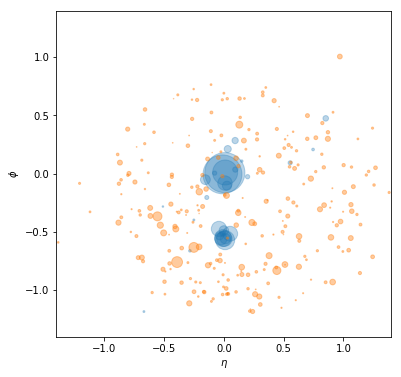

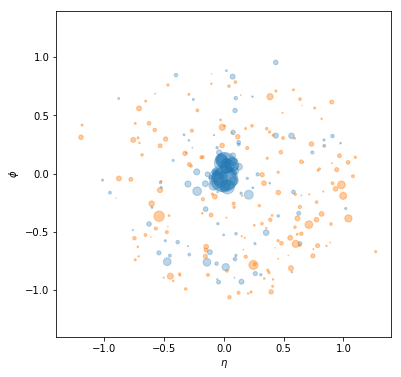

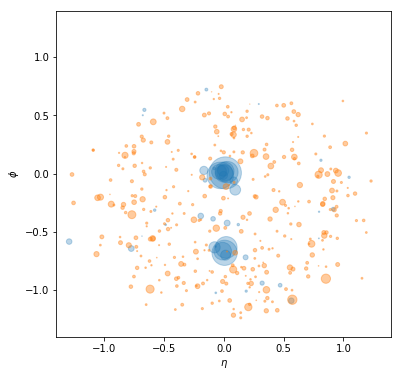

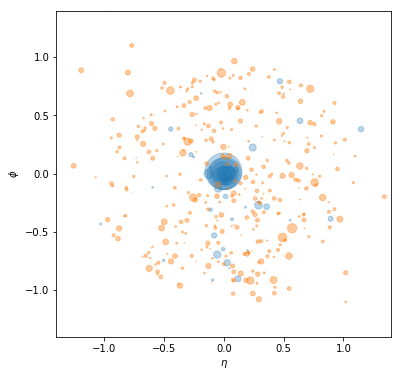

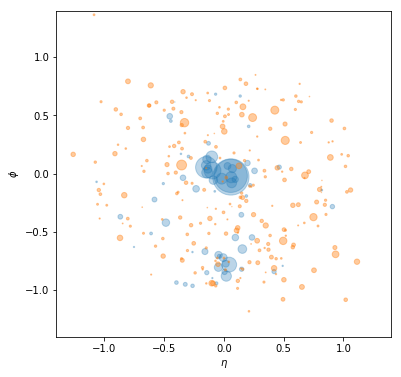

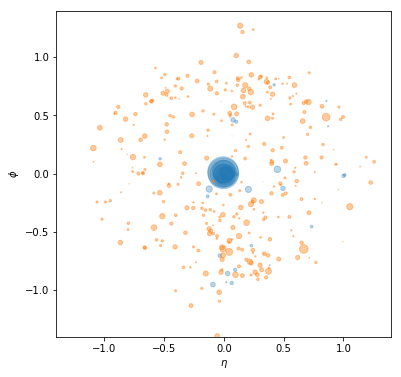

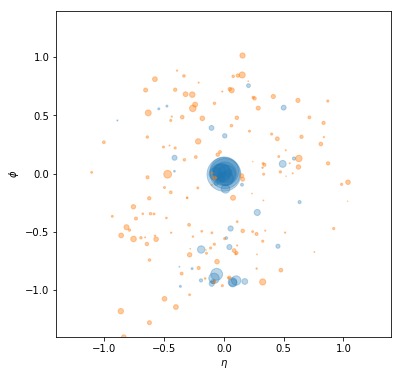

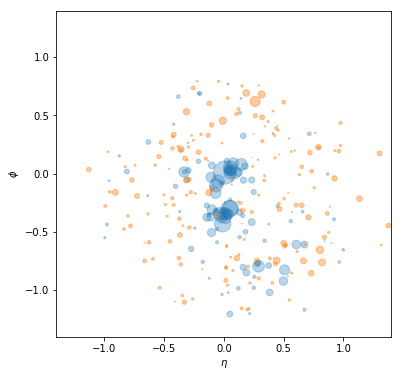

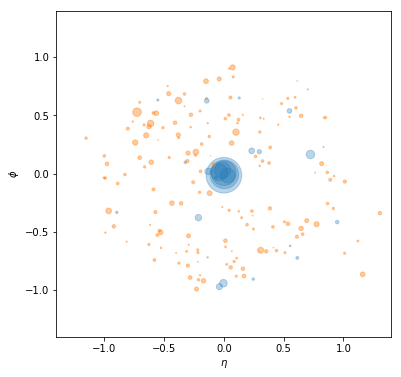

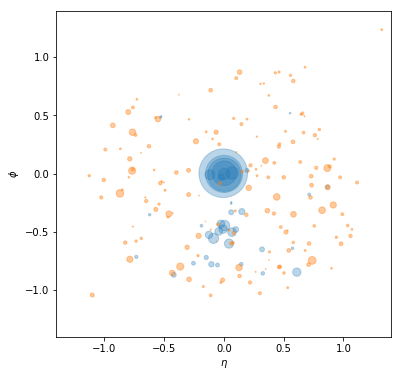

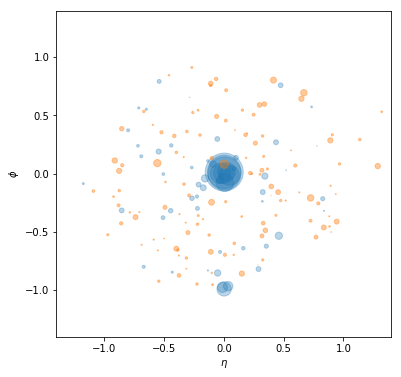

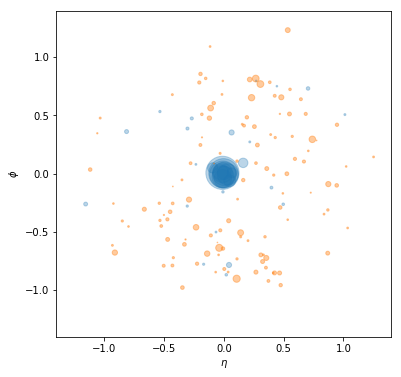

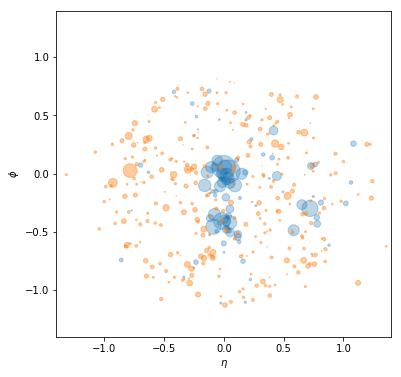

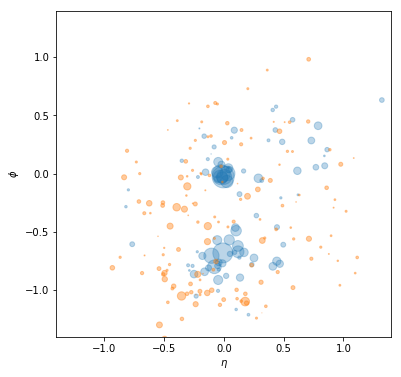

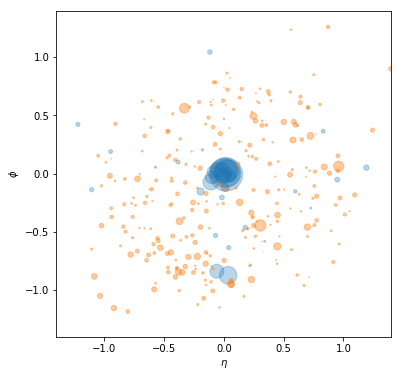

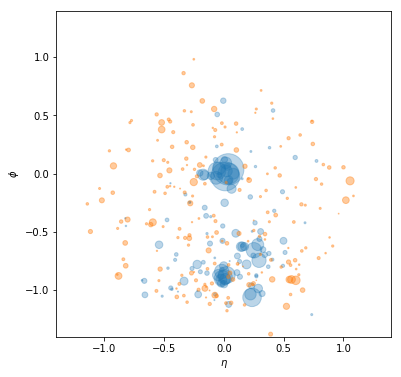

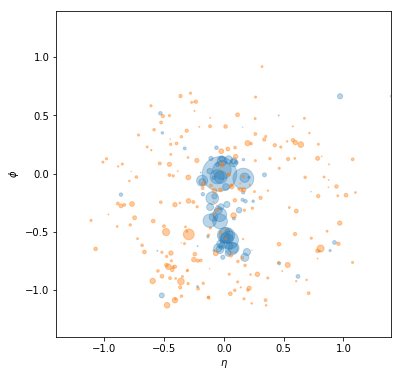

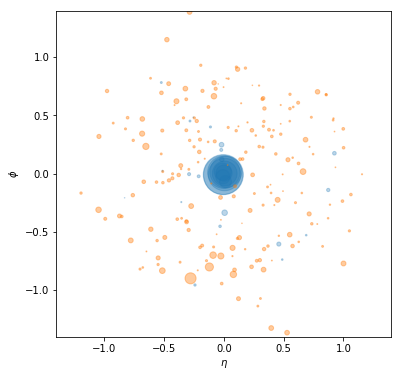

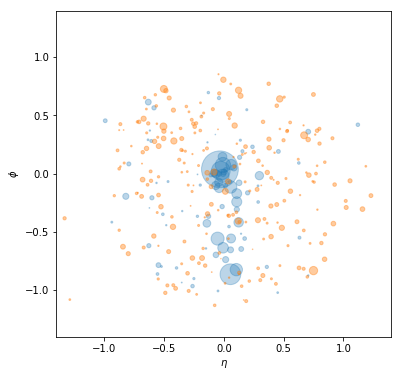

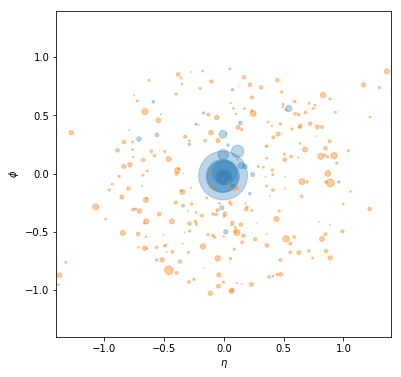

In [87]:
for i in range(10):
    make_jet_picture(a0_s[i], a_s[i], 'w_jet_' + str(i), show=True)
    make_jet_picture(a0_b[i], a_b[i], 'qcd_jet_' + str(i), show=True)